In [ ]:
import pandas as pd
from prophet import Prophet
from datetime import datetime as dt
from datetime import date, time
import numpy as np


In [41]:
df = pd.read_csv('dailyprophet.csv')
df['ds'] = pd.to_datetime(df['ds'])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      395 non-null    datetime64[ns]
 1   y       395 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [57]:
m = Prophet()
m.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [58]:

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
755,2023-09-26
756,2023-09-27
757,2023-09-28
758,2023-09-29
759,2023-09-30


In [59]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
755,2023-09-26,24.505670,-89.915343,131.611536
756,2023-09-27,24.576468,-90.200928,131.805954
757,2023-09-28,23.188126,-88.840810,129.972415
758,2023-09-29,22.940302,-92.562093,130.554677
759,2023-09-30,20.331554,-95.235448,125.162802


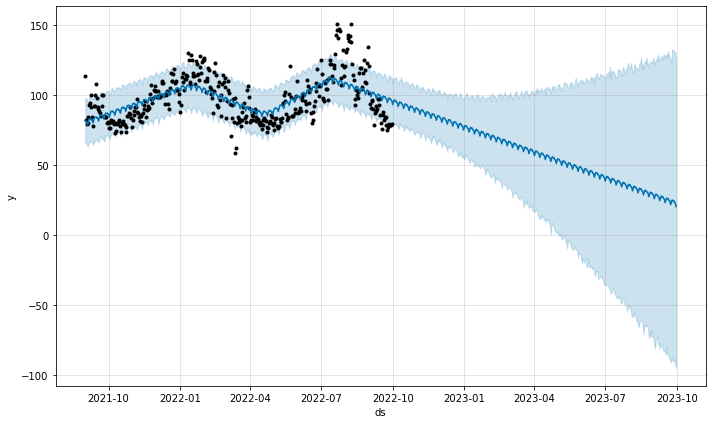

In [60]:
fig1 = m.plot(forecast)

<AxesSubplot:>

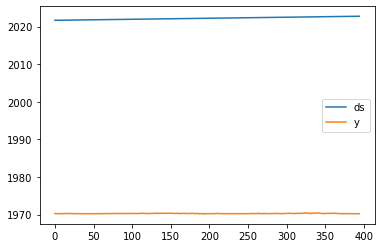

In [26]:
def todaily(file):
    df = pd.read_csv(file)
    #create a new column with hour format
    df["Hour"] = pd.to_datetime(df.loc[:,"Hour"], format = '%H').dt.time
    #change the dates to datetime format
    df["Date"] = pd.to_datetime(df.loc[:,"Date"]).dt.date
    #Join it together to be able to resample
    new_df = pd.to_datetime(df.loc[:,"Date"].astype(str) + ' ' +df.loc[:,"Hour"].astype(str))
    # add column to our orignal data frame
    df.insert(3, 'datetime', new_df)
    #drop the unecessary columns
    df = df.drop(["Hour", "Date"], axis=1)
    #Set date values as index
    df1 = df.set_index("datetime")
    #resample into daily format
    dailybbatch = df1.resample('D').sum()
    dailybbatch.to_csv('dailyprophet.csv')

In [28]:
todaily('prophet.csv')

In [48]:

df

,ds,y
0,2021-09-01,113.813
1,2021-09-02,81.800
2,2021-09-03,78.900
3,2021-09-04,80.000
4,2021-09-05,84.100
...,...,...
390,2022-09-26,79.508
391,2022-09-27,78.781
392,2022-09-28,78.880
393,2022-09-29,78.412


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DS      395 non-null    datetime64[ns]
 1   Y       395 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [32]:
df['DS'] = pd.to_datetime(df['DS'])

In [52]:
df1 = pd.read_csv('dailyprophet.csv', header = 0)


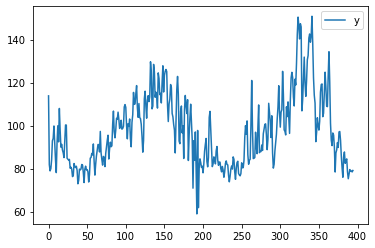

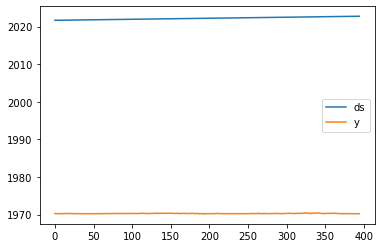